In [1]:
import pandas as pd
import numpy as np
import matplotlib as mtp
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

data = pd.read_csv('iris.txt', sep=',', header=0)

new_data = pd.DataFrame(data,columns=['PetalLength','PetalWidth']) 
data.head(n=0)
new_data.describe()

,PetalLength,PetalWidth
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


The above steps read the original data set in using pandas csv read module and then creates a new data set with just the 2 columns that are needed. It then outputs the summary statistics of the new data set to confirm there is no missing data. 

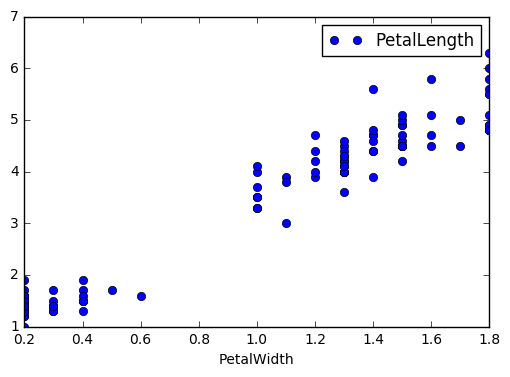

In [2]:
#Steps 3 and 4
x = new_data['PetalLength'].values
y = new_data['PetalWidth'].values
new_data.plot(x='PetalWidth', y='PetalLength', style='bo')


The above code is used to create a new data set of just the two columns (PetalLength and PetalWidth). This new data set is graphed on a scatter plot to determine if there are any outliers. Looking at the data it looks like it will work well for a Least Squares Estimate (the data lines up to where a straight line estimate would make sense).

In [3]:
def beta_calc(new_data):
    x_one = np.ones(150)
    x_new = np.stack((x_one,x), axis=-1)
    x_trans = np.transpose(x_new)
    x_trans_x = np.dot(x_trans, x_new)
    x_trans_x_inv = np.linalg.inv(x_trans_x)
    x_trans_y = np.dot(x_trans, y) 
    beta = np.dot(x_trans_x_inv, x_trans_y)
    return beta

The above code splits the Beta calculation into several steps. These steps can be combined into a single line item, however I prefer to set it up with multiple steps. This makes it easier to quickly determine which step causes a problem if there's a failure. 

1. x_new creates a new data set by inserting 1s in the first column of the x dataframe.
2. x_trans uses the transpose function from numpy to take the transpose of the x_new data set.
3. x_trans_x calculates the the dot product of the x_trans and the original x_new data set.
4. x_trans_x_inv calculates the inverse of the x_trans_x by utilizing the inverse function of the linear algebra section of numpy.
5. x_trans_y is the multiplication of the x_trans(#2) and y
6. beta is calculated by taking #4 and multiplying it by #5.

The first takes the transpose of the 

In [4]:
#Least Squares Estimate, not using modules.
# http://glowingpython.blogspot.com/2012/03/linear-regression-with-numpy.html
#https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
#http://www.kdnuggets.com/2016/11/linear-regression-least-squares-matrix-multiplication-concise-technical-overview.html

beta = beta_calc(new_data)

def prediction_func(x,beta):
    y = beta[0] + (x*beta[1])
    return y

new_data['Prediction'] = prediction_func(new_data['PetalLength'],beta)


Once the beta is calculated, the next step is to use this beta to calculate the predicted values by using a second function to calculate the prediction value based on the beta that comes out of the beta_calc function evaluated at each record of the new_data data set. 

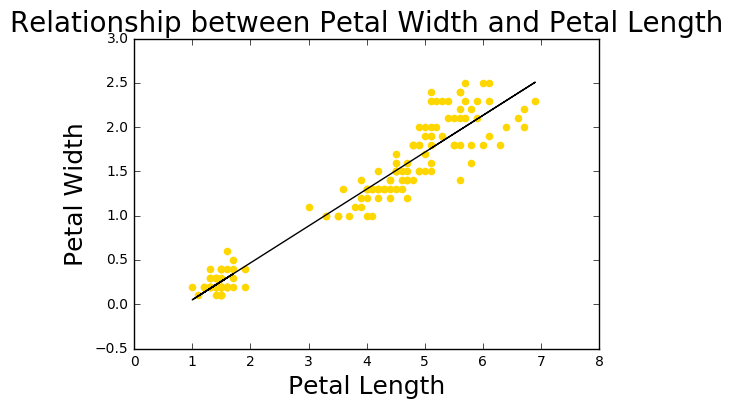

In [7]:
new_z = new_data['Prediction'].values

mtp.pyplot.scatter(x, y, color = 'gold')
mtp.pyplot.plot(x, new_z, color = 'black')
mtp.pyplot.title('Relationship between Petal Width and Petal Length', fontsize = 20)
mtp.pyplot.xlabel('Petal Length', fontsize = 18)
mtp.pyplot.ylabel('Petal Width', fontsize = 18)


The above graph is a combination of 2 graphs. The first is the scatter plot of the original x and y. These colors are in gold. The overlayed graph is the plot of the predicted values based on the regression. These are in black. As expected this is a straight line through the data. 